# 101 Things I wish I knew before I started

Well it's actually it is on Deep Learning

# PySnoop

This isn't really ML/Dl, but it is an excellent package for debugging things away from an IDE, like when running in the Cloud or on Pawsey

In [1]:
import pysnooper

@pysnooper.snoop()
def number_to_bits(number):
    if number:
        bits = []
        while number:
            number, remainder = divmod(number, 2)
            bits.insert(0, remainder)
        return bits
    else:
        return [0]

number_to_bits(6)


Source path:... <ipython-input-1-0ce80869ec72>
Starting var:.. number = 6
08:37:54.560436 call         3 
08:37:54.560805 line         5 def number_to_bits(number):
08:37:54.560909 line         6     if number:
New var:....... bits = []
08:37:54.560980 line         7         bits = []
08:37:54.561071 line         8         while number:
Modified var:.. number = 3
New var:....... remainder = 0
08:37:54.561143 line         9             number, remainder = divmod(number, 2)
Modified var:.. bits = [0]
08:37:54.561255 line         7         bits = []
08:37:54.561346 line         8         while number:
Modified var:.. number = 1
Modified var:.. remainder = 1
08:37:54.561412 line         9             number, remainder = divmod(number, 2)
Modified var:.. bits = [1, 0]
08:37:54.561511 line         7         bits = []
08:37:54.561593 line         8         while number:
Modified var:.. number = 0
08:37:54.561658 line         9             number, remainder = divmod(number, 2)
Modified var:.. 

[1, 1, 0]

In [3]:
import random

def foo():
    lst = [random.randrange(1, 1000) for _ in range(10)]

    with pysnooper.snoop():
        lower = min(lst)
        upper = max(lst)
        mid = (lower + upper) / 2
        print(lower, mid, upper)

foo()


76 526.0 976


Source path:... <ipython-input-3-9f53038da383>
New var:....... lst = [788, 76, 129, 558, 976, 86, 676, 260, 730, 907]
08:42:52.654760 line         7     with pysnooper.snoop():
New var:....... lower = 76
08:42:52.655423 line         8         lower = min(lst)
New var:....... upper = 976
08:42:52.655548 line         9         upper = max(lst)
New var:....... mid = 526.0
08:42:52.655747 line        10         mid = (lower + upper) / 2
Elapsed time: 00:00:00.001355


# Choosing a Loss Function

## Regression

Let's create a fake data set.

It will have 20 input features; 10 of the features will be meaningful and 10 will not be relevant.
A total of 1,000 examples will be randomly generated.
The pseudorandom number generator will be fixed to ensure that we get the same 1,000 examples each time the code is run.

In [5]:
from sklearn.datasets import make_regression

# generate regression dataset
x, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1, n_informative=10)

print(f"x: {x.shape}")
print(f"y: {y.shape}")

DescribeResult(nobs=1000, minmax=(array([-3.2803276 , -3.17346164, -2.59394958, -3.03844259, -2.85405414,
       -3.29485841, -3.21913211, -2.92823975, -3.02605666, -3.45140291,
       -2.88669407, -3.31084256, -3.25920607, -3.6564401 , -3.05376438,
       -3.2606151 , -3.02934398, -2.80213204, -2.85752773, -3.16521012]), array([3.9586027 , 2.71738624, 2.83914771, 2.84357185, 4.16811768,
       3.2383432 , 2.97552464, 3.10674933, 3.11847959, 4.02684904,
       3.43266343, 3.07707905, 3.56087332, 2.85773394, 3.44695602,
       2.85442408, 3.83438102, 2.89080818, 3.39811566, 3.13504734])), mean=array([-0.05194637,  0.0263475 ,  0.00908061,  0.03309822,  0.05582714,
        0.01637195, -0.03234449, -0.02494513, -0.0153189 , -0.05608363,
        0.01240379,  0.10817031,  0.00778275,  0.00064864,  0.00967454,
        0.00189102,  0.07882719,  0.04600556, -0.00813191, -0.02527809]), variance=array([0.97175594, 0.99989537, 1.01039088, 0.93743592, 0.95785744,
       1.05917175, 1.03691368, 1.0

Neural networks generally perform better when the real-valued input and output variables are to be scaled to a sensible range.
For this problem, each of the input variables and the target variable have a Gaussian distribution; therefore, standardising the data in this case is desirable.

In [7]:
from sklearn.preprocessing import StandardScaler

# standardise dataset
x = StandardScaler().fit_transform(x)

# The standardiser expects an array (elements, features)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

DescribeResult(nobs=1000, minmax=(array([-3.27660031, -3.20157773, -2.59090656, -3.17396951, -2.97469257,
       -3.21901838, -3.1311154 , -2.90301059, -2.95694896, -3.45960595,
       -2.86247776, -3.51730081, -3.12110409, -3.60011286, -3.0673745 ,
       -3.26169793, -3.10537115, -3.00256897, -2.87108072, -3.11188132]), array([4.0704506 , 2.69252613, 2.81688605, 2.90419635, 4.20388289,
       3.13224498, 2.95532257, 3.13138809, 3.07781114, 4.16023857,
       3.37705647, 3.05425733, 3.39443021, 2.81257314, 3.44169733,
       2.85182645, 3.7521706 , 2.99905316, 3.4321703 , 3.13209252])), mean=array([-2.50910404e-17,  2.02893258e-17, -3.41948692e-17, -1.15463195e-17,
       -2.04281037e-17, -1.39888101e-17, -1.55431223e-17, -1.55431223e-17,
        4.08562073e-17, -2.93098879e-17,  2.12052598e-17, -3.38618023e-18,
       -7.38298311e-18, -7.54951657e-18,  2.10109707e-17,  2.88657986e-18,
        1.96787031e-17, -1.86517468e-17,  5.99520433e-18, -1.90680804e-17]), variance=array([1.00100

Once scaled, the data will be split evenly into train and test sets.

In [9]:
# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]


### Mean Squared Errors

Now a cheap and cheerful network using the go to first loss function

Train: 0.003, Test: 0.008


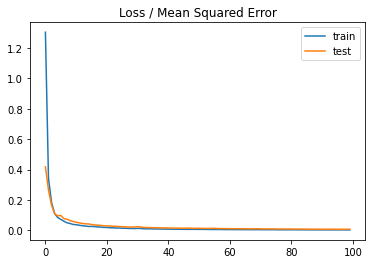

array([[ 0.64516745,  0.76000873, -0.18010938, ..., -0.76479647,
        -0.2088517 ,  1.04702956],
       [ 1.91668806, -0.46635771,  1.19569536, ..., -0.70196101,
         0.04332125,  0.27556296],
       [-0.06519522,  0.31264841, -1.83288453, ...,  0.37878977,
        -0.16435327,  0.65283426],
       ...,
       [-0.15471527, -0.27429653, -1.35192974, ...,  0.67848377,
        -0.21611277, -0.84236813],
       [-1.07225152, -0.16523037,  0.48553115, ..., -0.02186635,
         1.48243756,  1.74981514],
       [-1.24570623, -0.19130146,  0.60895001, ...,  2.72939424,
        -1.42222369, -0.20585159]])

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))

# fit model
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(train_x, train_y, verbose=0)
test_mse = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Mean Squared Logarithmic Error Loss
There may be problems in which the target value has a spread of values and when predicting a large value, you may not want to punish a model as heavily as mean squared error.

Instead, you can first calculate the natural logarithm of each of the predicted values, then calculate the mean squared error.
This is called the Mean Squared Logarithmic Error loss.

It has the effect of relaxing the punishing effect of large differences in large predicted values.

As a loss measure, it may be more appropriate when the model is predicting unscaled quantities directly.
Nevertheless, we can demonstrate this loss function using our simple regression problem.

The model can be updated to use the ‘mean_squared_logarithmic_error‘ loss function and keep the same configuration for the output layer.
We will also track the mean squared error as a metric when fitting the model so that we can use

Train: 0.003, Test: 0.006


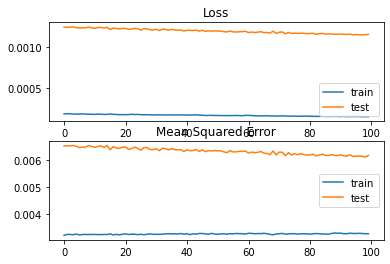

In [14]:
model.compile(loss='mean_squared_logarithmic_error', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['mse'])

# fit model
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=100, verbose=0)

# evaluate the model
_, train_mse = model.evaluate(train_x, train_y, verbose=0)
_, test_mse = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

### Mean Absolute Error Loss
On some regression problems, the distribution of the target variable may be mostly Gaussian, but may have outliers, e.g. large or small values far from the mean value.

The Mean Absolute Error, or MAE, loss is an appropriate loss function in this case as it is more robust to outliers.
It is calculated as the average of the absolute difference between the actual and predicted values.

Train: 0.001, Test: 0.001


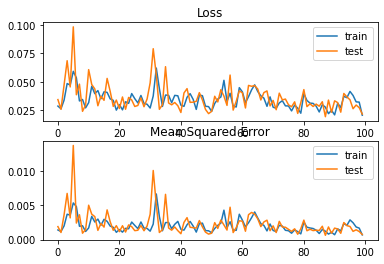

In [16]:
model.compile(loss='mean_absolute_error', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['mse'])

# fit model
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=100, verbose=0)

# evaluate the model
_, train_mse = model.evaluate(train_x, train_y, verbose=0)
_, test_mse = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

### The take away message

Keep you code modular so you can simple change a value and it'll work



# Batch Normalisation

Batch normalization is a layer that allows every layer of the network to do "learning" more independently.
It is used to normalise the output of the previous layers.

* Using batch normalization learning becomes efficient also it can be used as regularisation to avoid overfitting of the model.
* The layer is added to the sequential model to standardise the input or the outputs.
* It can be used at several points in between the layers of the model.

We will use a standard binary classification problem that defines two two-dimensional concentric circles of observations, one circle for each class.

Each observation has two input variables with the same scale and a class output value of either 0 or 1.
This dataset is called the “circles” dataset because of the shape of the observations in each class when plotted.

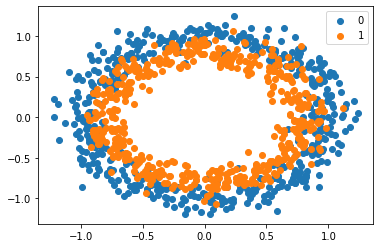

In [18]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot

# generate circles
x, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# select indices of points with each class label
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(x[samples_ix, 0], x[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

Let's build a simple model

Train: 0.834, Test: 0.850


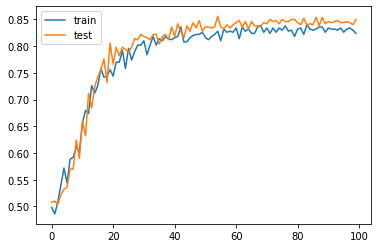

In [19]:
# split into train and test
n_train = 500
trainX, testX = x[:n_train, :], x[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Now add batch normalisation


Train: 0.824, Test: 0.838


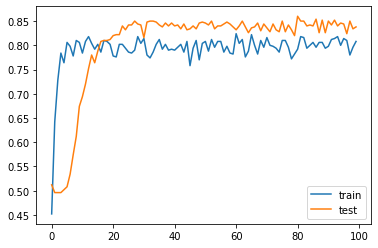

In [20]:
from tensorflow.keras.layers import BatchNormalization

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


It learns much faster

The original paper suggested doing the Batch normalisation before the activation. Let's try it.

Train: 0.810, Test: 0.826


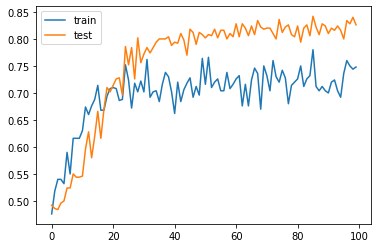

In [21]:
from tensorflow.keras.layers import Activation

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

The learning is slower and less accurate.
So be careful.

# Dropout

Dropout is a method to combat overfitting in neural networks.
The idea behind Dropout is to approximate an exponential number of models to combine them and predict the output.

Dropout can be easily implemented by randomly disconnecting some neurons of the network, resulting in what is called a “thinned” network.

![dropout](images/dropout.png)


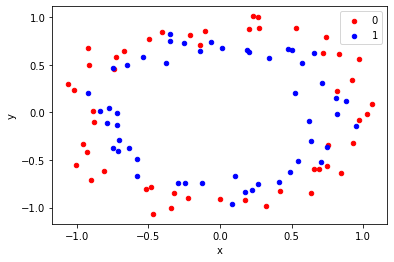

In [22]:
# generate two circles dataset
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

An overfitting model

Train: 0.967, Test: 0.771


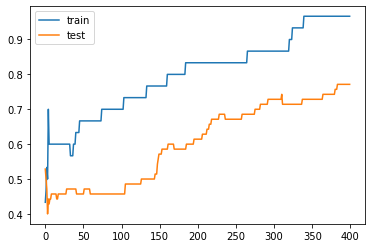

In [25]:
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=400, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

The plot and accuracies are classic signs of overfitting

Train: 0.833, Test: 0.629


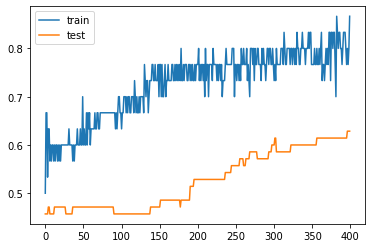

In [31]:
from tensorflow.keras.layers import Dropout

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=400, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Actually looks worse, let's increase the epochs

Train: 0.967, Test: 0.757


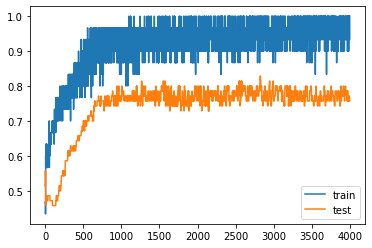

In [33]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()